In [36]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 
import ast
import json 
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

## Need to create RGB images in the same way we were with .mat files but now from nifti

First read in the aligned DTI from the last notebook: 

In [7]:
aligned_dti = pd.read_csv('aligned_dti.csv')

In [8]:
aligned_dti.head()

,cohort,dti,exam,patient_id,segmentation_name,adc,aligned_dti
0,TCGA-LGG-nifti,"['400-DTI_2.6mm_WH-19253.nii.gz', '4-DTI_2.6mm...",08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436,TCGA-DU-5853,11-AX_T1_POST_GD_FLAIR-81300a_n,diffusion_b=1000,/working/lupolab/julia/tcia_analysis/datasets/...
1,TCGA-LGG-nifti,['205-dadc-52244.nii.gz'],06-01-2000-MRI_BRAIN_per_R-97608,TCGA-CS-6186,1001-T1_SE_POST-94212a_n,['205-dadc-52244.nii.gz'],['/working/lupolab/julia/tcia_analysis/dataset...
2,TCGA-LGG-nifti,"['12-ep2ddiffmddw20p2_wipADC-35015.nii.gz', '1...",04-23-2004-NR_MRI_BRAIN_WWO-08141,TCGA-FG-A6J1,20-T1fl2dAx__Gd-43129a_n,"['12-ep2ddiffmddw20p2_wipADC-35015.nii.gz', '1...",['/working/lupolab/julia/tcia_analysis/dataset...
3,TCGA-LGG-nifti,"['601-DTI_ASSET-84919.nii.gz', '600-DTI_ASSET-...",06-18-1989-MRI_BRAIN_WWO_CONTRAS-16160,TCGA-DU-7015,10-AX_T1_POST_GD_FLAIR-19430a_n,diffusion_b=1000,/working/lupolab/julia/tcia_analysis/datasets/...
4,TCGA-LGG-nifti,"['501-DTI_2.6mm_WH-21034.nii.gz', '5-DTI_2.6mm...",01-11-1997-MRI_BRAIN_WWO_CONTRAST-98366,TCGA-DU-8164,10-AX_T1_POST_GD_FLAIR-02819a_n,diffusion_b=1000,/working/lupolab/julia/tcia_analysis/datasets/...


In [58]:
adc_dict = {row['patient_id']: row['aligned_dti'] for idx, row in aligned_dti.iterrows()}

In [73]:
seg_dict = {row['patient_id']: row['segmentation_name'] for idx, row in aligned_dti.iterrows()}

In [74]:
seg_dict

{'TCGA-DU-5853': '11-AX_T1_POST_GD_FLAIR-81300a_n',
 'TCGA-CS-6186': '1001-T1_SE_POST-94212a_n',
 'TCGA-FG-A6J1': '20-T1fl2dAx__Gd-43129a_n',
 'TCGA-DU-7015': '10-AX_T1_POST_GD_FLAIR-19430a_n',
 'TCGA-DU-8164': '10-AX_T1_POST_GD_FLAIR-02819a_n',
 'TCGA-DU-A5TR': '10-AX_T1_POST_GD_FLAIR-23755a_n',
 'TCGA-HT-7604': '12-CAX_3D_SPGR-37353a_n',
 'TCGA-DU-8163': '12-AX_T1_POST_GD_FLAIR-07772a_n',
 'TCGA-DU-7018': '13-AX_T1_POST_GD_FLAIR-47091a_n',
 'TCGA-EZ-7265A': '10-T1AXMPRSEL3D-83348a_n',
 'TCGA-DU-A6S7': '1103-POST_AX_T1__3MM-87638a_n',
 'TCGA-DU-7302': '11-AX_T1_POST_GD_FLAIR-45183a_n',
 'TCGA-DU-7306': '11-AX_T1_POST_GD_FLAIR-17891a_n',
 'TCGA-DU-A6S3': '1302-POST_AX_T1_BRAIN_LAB_1MM-00396a_n',
 'TCGA-HT-A5R7': '9-C_SAG_T1_SE-69743a_n',
 'TCGA-HT-8114': '11-AX_3D_SPGR-99436a_n',
 'TCGA-DU-5871': '11-AX_T1_POST_GD_FLAIR-63849a_n',
 'TCGA-DU-6407': '10-AX_T1_POST_GD_FLAIR-91295a_n',
 'TCGA-HT-7694': '13-CAX_3D_SPGR-47898a_n',
 'TCGA-HT-8107': '13-Ax_T1_MP_SPGR_C-64481a_n',
 'TCGA-DU-816

Next read in the json file for segmentation: 

In [10]:
with open('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/config/config_datalist_stripped.json') as f: 
    datalist = json.load(f)

In [20]:
datalist

{'validation': [{'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/8-AX_T1_pre_gd-14019a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/7-AX_T2_FR-FSE_RF2_150-55295a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/301-T1_SAG_SE-41348a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/501-T2-WHOLE_BRAIN-32557a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/401-T2_AX_FLAIR-72445a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-FG-A6J1/04-23-2004-NR_MRI_BRAIN_WWO-08141/

Creating lookup dictionaries with the modalities we care about for creating images: 

In [24]:
t1_post_dict = {x['image'][0].split('/')[1]:x['image'][0].split('/')[2]+'/'+x['image'][0].split('/')[3] for x in datalist['validation']}

In [25]:
t1_pre_dict = {x['image'][0].split('/')[1]:x['image'][1].split('/')[2]+'/'+x['image'][1].split('/')[3] for x in datalist['validation']}

In [26]:
t2_fse_dict = {x['image'][0].split('/')[1]:x['image'][2].split('/')[2]+'/'+x['image'][2].split('/')[3] for x in datalist['validation']}

In [27]:
t2_flair_dict = {x['image'][0].split('/')[1]:x['image'][3].split('/')[2]+'/'+x['image'][3].split('/')[3] for x in datalist['validation']}

In [28]:
t1_post_dict

{'TCGA-DU-5853': '08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
 'TCGA-CS-6186': '06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
 'TCGA-FG-A6J1': '04-23-2004-NR_MRI_BRAIN_WWO-08141/20-T1fl2dAx__Gd-43129a_n.nii.gz',
 'TCGA-DU-5872': '02-23-1995-MRI_BRAIN_WWO_CONTRAST-88714/13-Ax_T1_2.5mm_for_surgery-85579a_n.nii.gz',
 'TCGA-DU-7015': '06-18-1989-MRI_BRAIN_WWO_CONTRAS-16160/10-AX_T1_POST_GD_FLAIR-19430a_n.nii.gz',
 'TCGA-DU-8164': '01-11-1997-MRI_BRAIN_WWO_CONTRAST-98366/10-AX_T1_POST_GD_FLAIR-02819a_n.nii.gz',
 'TCGA-DU-A5TR': '07-26-1997-MRI_BRAIN_WWO_CONTRAST-17402/10-AX_T1_POST_GD_FLAIR-23755a_n.nii.gz',
 'TCGA-HT-7604': '10-28-1995-MRI_BRAIN_FOR_STEREOTACTIC_WWO_CONTR-85806/12-CAX_3D_SPGR-37353a_n.nii.gz',
 'TCGA-DU-A5TU': '03-12-1998-MRI_BRAIN_W_AND_WO_CONTR-77342/15-Axial_T1_FSE_Post_Gad-17816a_n.nii.gz',
 'TCGA-DU-8163': '11-19-1996-MRI_BRAIN_WWO_CONTRAST-27038/12-AX_T1_POST_GD_FLAIR-07772a_n.nii.gz',
 'TCGA-DU-7018': '12-20-

## Pick a patient & test reading in all things we need: 

In [30]:
patient_id = aligned_dti['patient_id'][0]

In [33]:
cohort = aligned_dti['cohort'][0]

In [31]:
patient_id

'TCGA-DU-5853'

In [32]:
root_dir = Path('/working/lupolab/julia/tcia_analysis/datasets/')

In [99]:
t1c_vol = nib.load(Path(root_dir, cohort, patient_id, t1_post_dict[patient_id]))
t1c_vol = np.array(t1c_vol.dataobj)
t1c_vol.shape

(240, 240, 180)

In [100]:
fla_vol = nib.load(Path(root_dir, cohort, patient_id, t2_flair_dict[patient_id]))
fla_vol = np.array(fla_vol.dataobj)

fla_vol.shape

(240, 240, 180)

In [101]:
adc_vol = nib.load(Path(root_dir, cohort, patient_id, adc_dict[patient_id]))
adc_vol = np.array(adc_vol.dataobj)
adc_vol.shape

(240, 240, 180)

In [102]:
brainmask_name = '.'.join(t1_post_dict[patient_id].split('.')[:-2])+'_mask.nii.gz'
# print(brainmask_name)
brainmask_vol = nib.load(Path(root_dir, cohort, patient_id, brainmask_name))
brainmask_vol = np.array(brainmask_vol.dataobj)

brainmask_vol.shape

(240, 240, 180)

In [76]:
os.listdir('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/')

['10-AX_T1_POST_GD_FLAIR-95256a_n',
 '9-AX_T1_POST_GD_FLAIR-32350a_n',
 '11-AX_T1_POST_GD_FLAIR-45183a_n',
 '10-AX_3D_SPGR-35180a_n',
 '10-AX_3D_SPGR-56128a_n',
 '15-Ax_SE_T1_Post-42502a_n',
 '9-AX_3D_SPGR__C-46765a_n',
 '11-Ax_T1_2',
 '6-AX_T1_POST-52648a_n',
 '11-AX_T1_POST_GD_FLAIR-15818a_n',
 '12-POST_Ax_T1_MP_SPGR-64353a_n',
 '10-AX_T1_POST_GD_FLAIR-91295a_n',
 '12-AX_T1_POST_GD_FLAIR-53586a_n',
 '10-AX_T1_POST_GD_FLAIR-02819a_n',
 '6-AX_T1_POST-64479a_n',
 '13-AX_T1_POST_GD_FLAIR-47091a_n',
 '8-Ax_T1_2',
 '8-AXIAL_T1_GD-71120a_n',
 '12-AX_T1_POST_GD_FLAIR-47718a_n',
 '10-AX_T1_POST_GD_FLAIR-80095a_n',
 '11-AX_3D_SPGRC-33028a_n',
 '901-POST_AX_T1_FLAIR-75656a_n',
 '13-AxT1-thin_for_surgery-12089a_n',
 '6-3D_SPGR_AX-79240a_n',
 '12-AX_T1_POST_GD_FLAIR-37089a_n',
 '10-3d_T1_FSPGR__CONT-32567a_n',
 '801-brain_with_AX_T1_POST-26488a_n',
 '901-BRAIN_WWO_T1_POST-50983a_n',
 '6-AXIAL_T1_POST_GAD_FATSAT-04322a_n',
 '13-Ax_T1_MP_SPGR_C-64481a_n',
 '14-mpRAGE_AX3DSPGRFast-40697a_n',
 '10-AX

In [113]:
t2all_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/', seg_dict[patient_id], seg_dict[patient_id]+'_WT.nii.gz'))
t2all_vol = np.array(t2all_vol.dataobj)
t2all_vol.shape

(240, 240, 180)

In [114]:
cel_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/', seg_dict[patient_id], seg_dict[patient_id]+'_ET.nii.gz'))
cel_vol = np.array(cel_vol.dataobj)
cel_vol.shape

(240, 240, 180)

In [ ]:
seg_vol = nib.load(Path('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/', seg_dict[patient_id], seg_dict[patient_id]+'_WT.nii.gz'))
seg_vol = np.array(seg_vol.dataobj)
seg_vol.shape

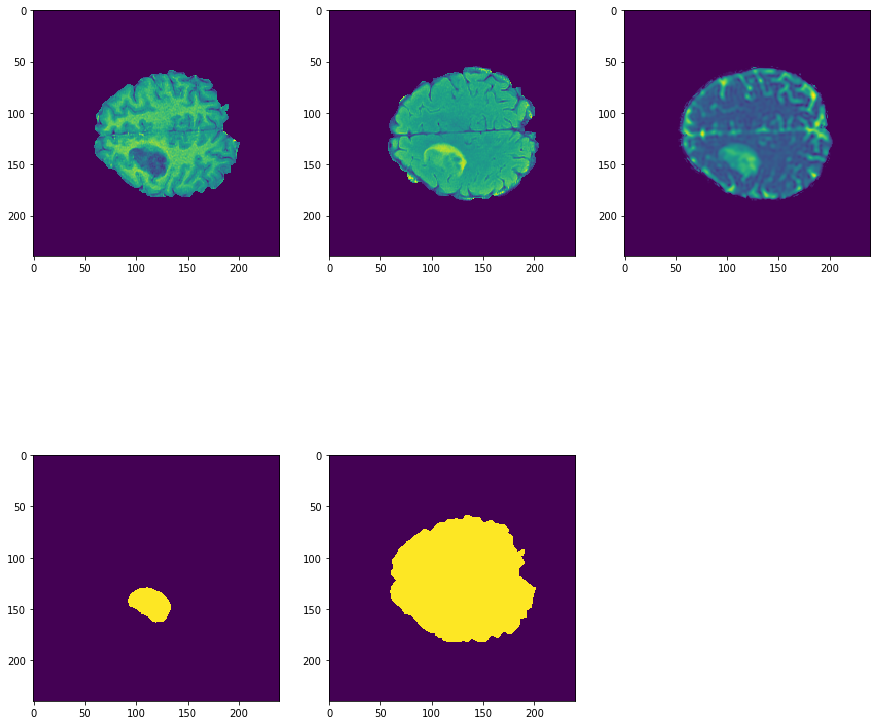

In [106]:
x = 130
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(t1c_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(fla_vol[:,:,x])
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(adc_vol[:,:,x])
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(seg_vol[:,:,x])
ax4 = fig.add_subplot(2,3,5)
ax4.imshow(brainmask_vol[:,:,x])


## Looks good; let's test the rest of our processing pipeline: 

In [145]:
file_types = ['t1ca', 'fla', 'adca', 't2all', 'cel', 'brainmask']
img_types = file_types[0:3]
roi_types = file_types[3:5]
brainmask_types = file_types[5:6] 
max_area_roi = 'cel'
directions = ['coronal', 'axial', 'sagittal']
sab = 5
crop_roi = 't2all'
crop_padding = 10

In [115]:
files_dict = {'t1ca': t1c_vol, 'fla': fla_vol, 'adca': adc_vol, 'cel': cel_vol, 't2all': t2all_vol, 'brainmask': brainmask_vol}

In [107]:
## NORMALIZATION:
def zscore_normalize(img, brainmask): 
    masked_image_values = img[brainmask==1]
    img_norm = (img-masked_image_values.mean())/np.std(masked_image_values)
    return img_norm

In [121]:
norm_files_dict = {}
for file_type in img_types: 
    x = files_dict[file_type]
    norm_files_dict[file_type] = zscore_normalize(files_dict[file_type], files_dict['brainmask'])
    for file_type in roi_types: 
        norm_files_dict[file_type] = files_dict[file_type]
    for file_type in brainmask_types: 
        norm_files_dict[file_type] = files_dict[file_type]

In [128]:
other_roi = [x for x in roi_types if x != max_area_roi][0]

In [96]:
## Finding the slices in each direction with greatest amount of ROI lesion: 
def find_slices_with_max_area_roi(roi_img):
    if len(np.unique(roi_img)) >2: 
        print("ERROR! Weird ROI w/ more than 0/1 values")
    sum_roi_axial = roi_img.sum(axis = 1).sum(axis = 1)
    sum_roi_sagittal = roi_img.sum(axis= 0).sum(axis = 0)
    sum_roi_coronal = roi_img.sum(axis = 0).sum(axis = 1)
    return {'axial': int(sum_roi_axial.argmax()), 'sagittal': int(sum_roi_sagittal.argmax()), 'coronal': int(sum_roi_coronal.argmax())}
    

In [130]:
slices = find_slices_with_max_area_roi(norm_files_dict[max_area_roi])

In [131]:
slices

{'axial': 135, 'sagittal': 139, 'coronal': 103}

In [134]:
def create_center_slices_dict(norm_files_dict, directions, slices, slices_above_and_below = 0):
    ## This function extracts the slices that correspond to the max value of roi
    center_slices_dict = {}
    for plane in directions: 
        slice_pick = slices[plane]
        for img in img_types: 
            center_slices_dict_key = img+"_"+plane+"_"+str(slice_pick)
            if plane == 'axial': 
                center_slices_dict[center_slices_dict_key] = norm_files_dict[img][slice_pick, :,:]
            elif plane == "sagittal": 
                center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, :,slice_pick]
            elif plane == 'coronal': 
                center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, slice_pick,:]
    
    if slices_above_and_below > 0: 
        
        for plane in directions: 
            slice_pick = slices[plane]+slices_above_and_below
            for img in img_types: 
                center_slices_dict_key = img+"_"+plane+"_"+str(slice_pick)
                if plane == 'axial': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][slice_pick, :,:]
                elif plane == "sagittal": 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, :,slice_pick]
                elif plane == 'coronal': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, slice_pick,:]
        
        for plane in directions: 
            slice_pick = slices[plane]-slices_above_and_below
            for img in img_types: 
                center_slices_dict_key = img+"_"+plane+"_"+str(slice_pick)
                if plane == 'axial': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][slice_pick, :,:]
                elif plane == "sagittal": 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, :,slice_pick]
                elif plane == 'coronal': 
                    center_slices_dict[center_slices_dict_key] = norm_files_dict[img][:, slice_pick,:]
                
    return center_slices_dict

In [137]:
center_slices_dict = create_center_slices_dict(norm_files_dict, directions, slices, slices_above_and_below=sab)

In [140]:
other_other_roi = [x for x in roi_types if x != crop_roi][0]

In [149]:
## CREATING ROI BOUNDS 
def roi_bounds(roi, plane, slice_pick): 
    if plane == 'axial': 
        roi_slice = roi[slice_pick, :,:]
    elif plane == 'sagittal': 
        roi_slice = roi[:, :,slice_pick]
    elif plane == 'coronal': 
        roi_slice = roi[:, slice_pick,:]
    
    if roi_slice.any(): 
        r = np.any(roi_slice, axis=(1))
        c = np.any(roi_slice, axis=(0))

        rmin, rmax = np.where(r)[0][[0, -1]]
        cmin, cmax = np.where(c)[0][[0, -1]]

        status_code = 0
        return rmin, rmax, cmin, cmax, status_code
    else: 
        rmin, rmax, cmin, cmax = None, None, None, None 
        status_code = 1
        return rmin, rmax, cmin, cmax, status_code 

## COMPUTING SQUARE ROI BOUNDS
def compute_square_dims_flex(roi_img, plane, slice_pick, padding = 0): 
    
    rmin, rmax, cmin, cmax, status_code = roi_bounds(roi_img, plane, slice_pick)
    
    if status_code == 0: 

        r = rmax-rmin
        c = cmax-cmin

        diff = abs(r - c)
        expand_number = int(diff/2)
    #     print(expand_number)
        if r == c: 
            print('already square.')
        if r > c: 
            if diff % 2 == 0: 
                cmax_new = cmax+expand_number+padding
                cmin_new = cmin-expand_number-padding
            else: 
                cmax_new = cmax+expand_number+1+padding
                cmin_new = cmin-expand_number-padding
            if cmin_new < 0: 
                cmin_new, cmax_new = cmin_new+abs(cmin_new), rmax_new+abs(cmin_new)
            return rmin-padding, rmax+padding, cmin_new, cmax_new, status_code

        else: 
            if diff % 2 == 0: 
                rmax_new = rmax+expand_number+padding
                rmin_new = rmin-expand_number-padding
            else: 
                rmax_new = rmax+expand_number+1+padding
                rmin_new = rmin-expand_number-padding    
            if rmin_new < 0: 
                rmin_new, rmax_new = rmin_new+abs(rmin_new), rmax_new+abs(rmin_new)

            return rmin_new, rmax_new, cmin-padding, cmax+padding, status_code 
    else: 
        return rmin, rmax, cmin, cmax, status_code 
        

## CREATING DICTIONARY OF CROPPED SLICES: 
def create_cropped_slices_dict(center_slices_dict, roi, padding = 0):
    cropped_slices_dict = {}
    for key, value in center_slices_dict.items(): 
#         print(key)
        img_type, plane, slice_pick = key.split('_')
        slice_pick = int(slice_pick)
        rmin, rmax, cmin, cmax, status_code = compute_square_dims_flex(roi, plane, slice_pick, padding)
        if status_code == 0: 
            if rmin < 0 or cmin < 0:
                rmin, rmax, cmin, cmax, status_code = compute_square_dims_flex(roi, plane, slice_pick, padding=0)
#             print(rmin, rmax, cmin, cmax)
            new_key = str(key)+"_dim"+str(rmax-rmin)
            cropped_slices_dict[new_key] = value[rmin:rmax, cmin:cmax]
        else: 
            continue
    return cropped_slices_dict

In [150]:
cropped_slices_dict = create_cropped_slices_dict(center_slices_dict, norm_files_dict[crop_roi], padding = crop_padding)

already square.
already square.
already square.


In [151]:
## CONCATENATING THE IMAGES + PUTTING THEM IN A DICTIONARY FOR WRITING: 
def create_imgs(cropped_slices_dict): 
    new_imgs_dict = {}
    #cropped slices dictionary 
    keys = cropped_slices_dict.keys()
    
    slices_of_interest = list(set(['_'.join((key.split('_')[-2], key.split('_')[-1])) for key in keys]))
    
    for slice_pick in slices_of_interest: 
        slices_for_img = [key for key in keys if slice_pick in key]
        slices_for_img.sort() 
        
        new_key = '_'.join((slices_for_img[0].split('_')[-3], slices_for_img[0].split('_')[-2]))
        
        adca_img = cropped_slices_dict[slices_for_img[0]]
        fla_img  = cropped_slices_dict[slices_for_img[1]]
        t1ca_img = cropped_slices_dict[slices_for_img[2]]
        
        new_img = np.dstack([t1ca_img, fla_img, adca_img])
        
        new_imgs_dict[new_key] = new_img
    
    return new_imgs_dict

In [152]:
new_images_dict = create_imgs(cropped_slices_dict)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


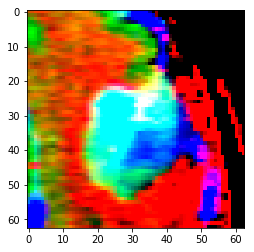

In [154]:
plt.imshow(new_images_dict['axial_135'])